# バーガース方程式

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from burgers import burgers1, burgers2

# 1次元

$$
\frac{\partial u}{\partial t} 
+ u \frac{\partial u}{\partial x} 
= \nu \frac{\partial^2 u}{\partial x^2}
$$

dx = 0.09817477042468103
dt = 0.009817477042468103
CFL = 0.1


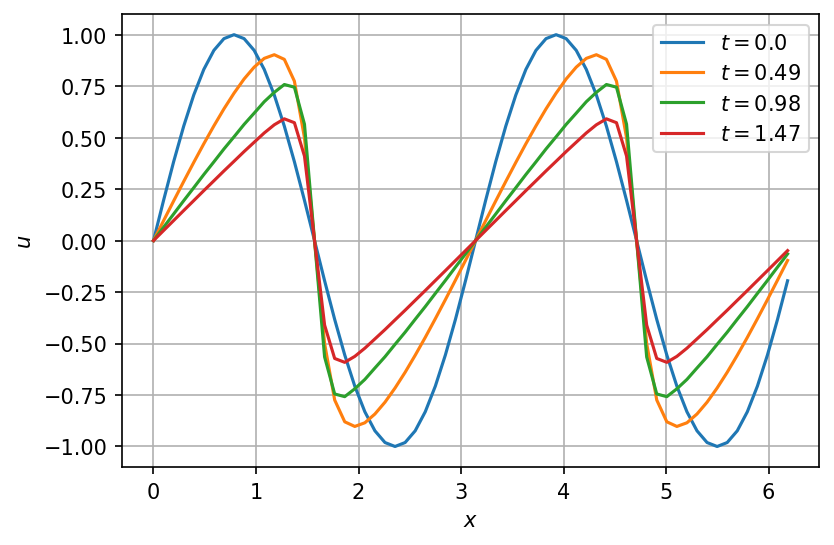

In [2]:
nu = 0.05

nx = 64 # Number of Partision
lx = 2 * np.pi
dx = lx / nx
x = np.linspace(0, lx, nx, endpoint=False)
u0 = np.sin(2*x)

t0 = 0 # Initial time.
ts_list = [0, 50, 100, 150]
CFL = 0.1
dt = CFL * dx / np.abs(u0).max()

print('dx =', dx)
print('dt =', dt)
print('CFL =', CFL)

# Central Difference Methods
solver = burgers1(x=x, nu=nu)

plt.figure(dpi=150)
for ts in ts_list:
    plt.plot(x, solver.solve(u0, t0, dt, ts), label="$t = {}$".format(round(t0 + dt*ts, 2)))
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.grid()
plt.legend()
plt.show()

## 2次元

$$
\frac{\partial u}{\partial t} 
+ u \frac{\partial u}{\partial x} 
+ v \frac{\partial u}{\partial y} 
= \nu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right )
$$
$$
\frac{\partial v}{\partial t} 
+ u \frac{\partial v}{\partial x} 
+ v \frac{\partial v}{\partial y} 
= \nu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right )
$$

dx = 0.09817477042468103
dy = 0.09817477042468103
dt = 0.009817477042468103
CFL = 0.1


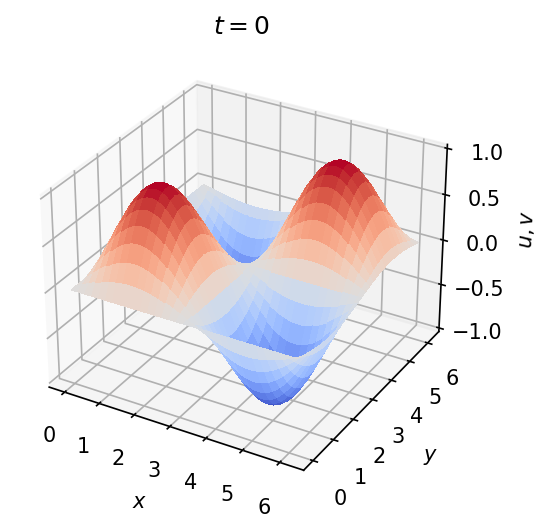

In [3]:
nu = 0.05

lx = 2 * np.pi
ly = 2 * np.pi
nx = 64
ny = 64
dx = lx / nx
dy = ly / ny
x = np.linspace(0, lx, nx, endpoint=False)
y = np.linspace(0, ly, ny, endpoint=False)
X, Y = np.meshgrid(x, y)

u0 = np.sin(X) * np.sin(Y)
v0 = np.sin(X) * np.sin(Y)
U0 = np.stack((u0, v0))

t0 = 0 # Initial time.
CFL = 0.1
dt = CFL * dx / np.abs(U0).max()

print('dx =', dx)
print('dy =', dy)
print('dt =', dt)
print('CFL =', CFL)

# Central Difference Methods
solver = burgers2(dx=dx, dy=dy, nu=nu)

### Plot
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=150)
surf = ax.plot_surface(X, Y, u0, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, v0, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u,v$")
ax.set_title("$t=0$")
plt.show()

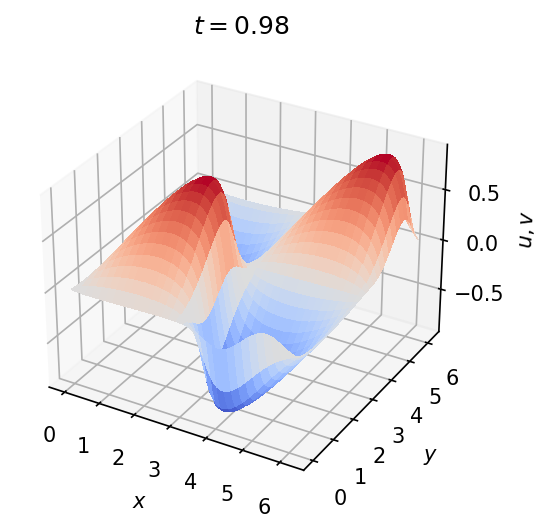

In [4]:
### Solve
ts = 100
solver = burgers2(dx=dx, dy=dy, nu=nu)
U = solver.solve(U0, t0, dt, ts)
u = U[0]
v = U[1]

### Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=150)
surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, v, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$u,v$")
ax.set_title("$t={}$".format(round(t0+dt*ts,2)))
plt.show()